In [1]:
import qiskit
qiskit.__version__

'1.2.1'

In [2]:
import numpy as np

# Importing standard Qiskit libralies
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister 
from qiskit_aer import StatevectorSimulator, AerSimulator

In [3]:
# 結果表示用の文字列
state_label = ["|000>", "|001>", "|010>", "|000>", "|011>", "|100>", "|101>", "|110>", "|111>"]

In [4]:
# 量子回路の初期化
qr = QuantumRegister(3, "q")
cr0 = ClassicalRegister(1, "c0")
cr1 = ClassicalRegister(1, "c1")
circuit = QuantumCircuit(qr, cr0, cr1)

# ステップ1:量子もつれ状態を共有する
circuit.h(1) # アダマールゲート行列を適用
circuit.cx(1,2) # CNOTを適用
circuit.barrier()

# ステップ2:移動する量子ビットを準備する
# qr[0]を好きな量子状態に変化させてください
# たとえば|1>にしたい場合は次の命令を実行します
# circuit.x(0)

# ステップ3:アリスの手元の量子ビットにCNOTとHを適用する
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

# ステップ4:アリスの手元の量子ビットを測定し、得た値を古典ビットとしてボブに通信する
circuit.measure([0,1], [0,1])
circuit.barrier()

# ステップ5:得た古典ビットにより、ボブが手元の量子状態を変化させる
with circuit.if_test((cr0, 1)):   
    circuit.z(2)
with circuit.if_test((cr1, 1)):
    circuit.x(2)

# 実行と結果取得(statevector_simulatorを利用)
backend = StatevectorSimulator()
result = backend.run(circuit).result().get_statevector(circuit, decimals=3)

print([str(coef) + label for (coef, label) in zip(result, state_label)])

['0j|000>', '(1+0j)|001>', '0j|010>', '0j|000>', '(-0+0j)|011>', '(-0+0j)|100>', '(-0+0j)|101>', '(-0+0j)|110>']


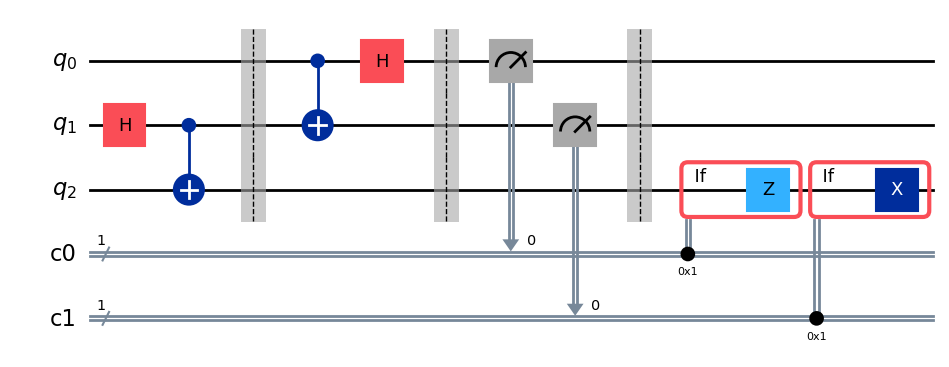

In [5]:
circuit.draw("mpl")